# Activation functions used in neural networks
---

***Author: Kai Brach / Philipp Schmieder***

This notebook accompanies the article from Piotr Skalski: <a href="https://towardsdatascience.com/https-medium-com-piotr-skalski92-deep-dive-into-deep-networks-math-17660bc376ba">Deep Dive into Math Behind Deep Networks</a>. The visualizations created in this book show the course of various popular activation functions.

Some helpful **Cheat-Sheets** for **Python/Numpy/Tensorflow**: 
* https://cdn.intellipaat.com/mediaFiles/2018/12/Python-NumPy-Cheat-Sheet-.pdf
* http://datasciencefree.com/numpy.pdf
* https://s3.amazonaws.com/dq-blog-files/numpy-cheat-sheet.pdf
* https://blog.finxter.com/wp-content/uploads/2019/04/11-Numpy-Cheat-Sheet.pdf

### Imports

In [70]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

from tensorflow.python.keras import backend as K
K.clear_session()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Auxiliary functions

In [71]:
# the auxiliary function forming the diagram
def make_plot(x, f, df=None, name='Enter Name',f_name=None,df_name=None):
    plt.figure()
    plt.figure(figsize=(12,6))
    plt.title(name, fontsize=20, fontweight='bold')
    plt.xlabel('z', fontsize=15)
    plt.ylabel('Activation function value', fontsize=15)
    sns.set_style("whitegrid")
    
    if f_name is None:
        plt.plot(x, f, label="f (z)")
    else:
        plt.plot(x, f, label=f_name)
    if df is not None:
        if df_name is None:    
            plt.plot(x, df, label="f '(z)")
        else:
            plt.plot(x, df, label=df_name)
        
    plt.legend(loc=4, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
    #plt.savefig(f'..\\doc\\pics\\activation_functions\\{name}.png')
    plt.show()

# Deep Learning Basics

This tutorial accompanies the [lecture on Deep Learning Basics](https://www.youtube.com/watch?list=PLrAXtmErZgOeiKm4sgNOknGvNjby9efdf&v=O5xeyoRL95U) given as part of [MIT Deep Learning](https://deeplearning.mit.edu).

In this tutorial, we mention seven important types/concepts/approaches in deep learning, introducing the first 2 and providing pointers to tutorials on the others. Here is a visual representation of the seven:

![Deep learning concepts](https://i.imgur.com/EAl47rp.png)

At a high-level, neural networks are either encoders, decoders, or a combination of both. Encoders find patterns in raw data to form compact, useful representations. Decoders generate new data or high-resolution useful infomation from those representations. As the lecture describes, deep learning discovers ways to **represent** the world so that we can reason about it. The rest is clever methods that help use deal effectively with visual information, language, sound (#1-6) and even act in a world based on this information and occasional rewards (#7).

1. **Feed Forward Neural Networks (FFNNs)** - classification and regression based on features. See [Part 1](#Part-1:-Boston-Housing-Price-Prediction-with-Feed-Forward-Neural-Networks) of this tutorial for an example.
2. **Convolutional Neural Networks (CNNs)** - image classification, object detection, video action recognition, etc. See [Part 2](#Part-2:-Classification-of-MNIST-Dreams-with-Convolution-Neural-Networks) of this tutorial for an example.
3. **Recurrent Neural Networks (RNNs)** - language modeling, speech recognition/generation, etc. See [this TF tutorial on text generation](https://www.tensorflow.org/tutorials/sequences/text_generation) for an example.
4. **Encoder Decoder Architectures** - semantic segmentation, machine translation, etc. See [our tutorial on semantic segmentation](https://github.com/lexfridman/mit-deep-learning/blob/master/tutorial_driving_scene_segmentation/tutorial_driving_scene_segmentation.ipynb) for an example.
5. **Autoencoder** - unsupervised embeddings, denoising, etc.
6. **Generative Adversarial Networks (GANs)** - unsupervised generation of realistic images, etc. See [this TF tutorial on DCGANs](https://github.com/tensorflow/tensorflow/blob/r1.11/tensorflow/contrib/eager/python/examples/generative_examples/dcgan.ipynb) for an example.
7. **Deep Reinforcement Learning** - game playing, robotics in simulation, self-play, neural arhitecture search, etc. We'll be releasing notebooks on this soon and will link them here.

There are selective omissions and simplifications throughout these tutorials, hopefully without losing the essence of the underlying ideas.

## 1. Neural Network Layers

A Neural Network consists of various different layers and can utilize different architectures to conquer the problems you have. The main principles all networks share are the Input and Output layers. Those have to be fitted specifically for your problems.

<img src="Pictures/small_fcn.PNG" width="500px" >


### Input Layer
The Input layer is always the first layer in the network. It makes sure to fit the input data (x-values,pictures, vectors) into Tensors, a shape that the network can understand. 
The basic implementation in Tensorflow/Keras looks like this:

In [72]:
from tensorflow.python.keras.layers import Input,Dense,Activation
from tensorflow.python.keras.models import Model

# this is a logistic regression in Keras

### with the keras functional model:
x = Input(shape=(3,))
z = Dense(4)(x)
g = Activation(activation="relu")(z)
y = Dense(2)(g)
model = Model(x, y)

# With the keras sequential model:
#model = keras.Sequential()
#model.add(Input(shape=(3,)))
#model.add(Dense(4))
#model.add(Activation(activation='relu'))
#model.add(Dense(2))

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense (Dense)                (None, 4)                 16        
_________________________________________________________________
activation (Activation)      (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 10        
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


### Dense Layer

A dense layer consists of multiple neurons that are connected with all the neurons in the previous layer. In Tensorflow/Keras you can implement it using the Dense() Function, where you also can specify how many neurons this layer should have and what the activation should be.

In [73]:
from tensorflow.python.keras.layers import Input,Dense
from tensorflow.python.keras.models import Model
# this is a logistic regression in Keras
x = Input(shape=(32,))
y = Dense(16, activation='relu')(x)
y = Dense(32, activation='relu')(y)
y = Dense(64, activation='linear')(y)
model = Model(x, y)
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
Total params: 3,184
Trainable params: 3,184
Non-trainable params: 0
_________________________________________________________________


*Question* can you calculate the Params yourself? How do they compute? 

### Convolution Layers


The basic structure is a little bit different now as we have a two dimensional picture. 
We use so called **Convolutions** to compress (and shrink) the information in the picture. They use filters to 'scan' the picture and detect edges or important parts of the image.

<img src="https://s3-us-west-2.amazonaws.com/static.pyimagesearch.com/keras-conv2d/keras_conv2d_padding.gif" width="500px" >

If the information is dense enough after those convolutions we can flatten the remaining picture (the so called feature map) and use a normal Dense layer to make the prediction


<img src="https://missinglink.ai/wp-content/uploads/2019/03/Frame-16.1.png" width="700px" >
 
 Those convolution layers have two effects, they extract the information from the picture and they shrink the picture if you dont apply some sort of frame around the picture (see first gif). This shrinking actually is a good thing as we want the picture to get smaller while we compress the information.
 
in Tensorflow/Keras the Convolution is called Conv2D (for 2 dimensional convolutions). With this function you need to specify the number of filters you want to have ( each filter creates one feature map,e.g one dimension) and how big the filter is. 

TODO variablen namen bei funktionen

In [74]:
from tensorflow.python.keras.layers import Input,Conv2D
from tensorflow.python.keras.models import Model
# this is a logistic regression in Keras
x = Input(shape=(28,28,1))
y = Conv2D(2,(3,3), activation='softmax')(x)
model = Model(x, y)
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 2)         20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


### Pooling Layers

Pooling layers help reducing the computational effort in the network by 'shrinking' the input. This is done by grouping small areas by their max/min or mean value to preserve the most important information while reducing the input size!
<img src="Pictures/pooling.png" width="700px" > 

In [75]:
N=1
H=4
W=4
C=1
# Create a Tensor(Matrix) with random numbers and the dimension 4x4 
tensor = tf.convert_to_tensor(np.random.choice(np.arange(1,20),[N,H,W,C]),dtype=tf.float32)
x = tensor.numpy()[0,:,:,:].transpose(2,0,1)
print('Tensor bevor max_pool2d operation:')
print(x)
# Do max or average pooling to that tensor
max_pool = tf.nn.max_pool2d(tensor,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
print(f'Tensor after max_pool2d operation:')
print(max_pool.numpy()[0,:,:,:].transpose(2,0,1))

Tensor bevor max_pool2d operation:
[[[ 8.  9. 12.  7.]
  [ 7. 19.  1. 17.]
  [ 7. 19. 17. 12.]
  [ 4.  3. 11.  6.]]]
Tensor after max_pool2d operation:
[[[19. 17.]
  [19. 17.]]]


<img src="https://raw.githubusercontent.com/tensorchiefs/dl_book/master/imgs/paper-pen.png" width="60" align="left" />  
Exercise:Try the same operation with the average_pool2d operation

In [76]:
#YOUR TURN

### Dropout 

If you have a training set for your neural network that has very few samples, your network tends to overfit this data. That means that it is likely to learn features that only the training data includes resulting in bad prediction for other data that was not included in the dataset. 

Dropout is used to prevent exactly that by dropping out different neurons in each layer after every training step. This forces the network to take different paths even if the input data would be the same resulting in a more robust training and reducing the risk of overfitting! 

<img src="pictures/dropout.png" width="500" align="middle" />  

In [77]:
# Imagine this Tensor (Vector) as one Layer with weights (random numbers) in your Network
tensor = tf.keras.backend.random_normal(shape=[10,1],mean=0.,stddev=1.)
print(tensor.numpy())

[[-0.16146748]
 [-1.088307  ]
 [-0.48538497]
 [ 1.307046  ]
 [ 1.2753826 ]
 [-1.1292626 ]
 [ 0.446686  ]
 [-1.1829959 ]
 [-0.66334194]
 [ 0.4110083 ]]


In [78]:
dropout_rate = 0.3
drop_out = tf.nn.dropout(tensor,rate=dropout_rate)

In [79]:
print(tensor.numpy())
print("----------------")
print(drop_out.numpy())

[[-0.16146748]
 [-1.088307  ]
 [-0.48538497]
 [ 1.307046  ]
 [ 1.2753826 ]
 [-1.1292626 ]
 [ 0.446686  ]
 [-1.1829959 ]
 [-0.66334194]
 [ 0.4110083 ]]
----------------
[[-0.23066783]
 [-1.5547243 ]
 [-0.        ]
 [ 1.8672087 ]
 [ 1.8219752 ]
 [-0.        ]
 [ 0.63812286]
 [-1.6899942 ]
 [-0.94763136]
 [ 0.58715475]]


One important thing to notice is, that the sum of the weights has to stay the same, thus the remaining (non zero) weights are rescalled with a factor

In [80]:
print(f'original sum of weights: {tensor.numpy().sum()}')
scale = 1/(1-dropout_rate)
print(np.sum(drop_out[drop_out!=0].numpy()))
print(f'scaled sum of weights: {np.sum((tensor*scale)[drop_out!=0].numpy())}')

original sum of weights: -1.270636796951294
0.49144387
scaled sum of weights: 0.4914438724517822


## 2. Loss Functions

As part of the optimization algorithm, the error for the current state of the model must be estimated repeatedly. This requires the choice of an error function, conventionally called a loss function, that can be used to estimate the loss of the model so that the weights can be updated to reduce the loss on the next evaluation.

Neural network models learn a mapping from inputs to outputs from examples and the choice of loss function must match the framing of the specific predictive modeling problem, such as classification or regression. Further, the configuration of the output layer must also be appropriate for the chosen loss function.

### Mean Squared Error
Mean squared error is calculated as the average of the squared differences between the predicted and actual values. The result is always positive regardless of the sign of the predicted and actual values and a perfect value is 0.0. The squaring means that larger mistakes result in more error than smaller mistakes, meaning that the model is punished for making larger mistakes.

In [94]:
y_true = [[0., 1.], [0., 1.]]
y_pred = [[0., 1.], [0., 1.]]

mse = tf.keras.losses.MeanSquaredError()
mse(y_true, y_pred).numpy()

0.0

### Binary Crossentropy
Binary classification loss function comes into play when solving a problem involving just two classes. For example, when predicting fraud in credit card transactions, a transaction is either fraudulent or not. 

In [95]:
y_true = [[0., 1.], [0., 0.]]
y_pred = [[1., 0.], [0., 0.]]
# Using 'auto'/'sum_over_batch_size' reduction type.  
bce = tf.keras.losses.BinaryCrossentropy()
bce(y_true, y_pred).numpy()

7.6895466

### Categorical Crossentropy
Categorical Crossentropy is used when you have to classify between multiple classes (non binary). Here you most likely have your true_values as one-hot-encoded vectores, where the true class has a 1 and all the other classes have a 0. 

In [83]:
y_true = [[0, 1, 0], [0, 0, 1]]
y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]]
# Using 'auto'/'sum_over_batch_size' reduction type.  
cce = tf.keras.losses.CategoricalCrossentropy()
cce(y_true, y_pred).numpy()

1.1769392

## 3. Optimizers

After defining the loss function we need to optimize it, so that it gets minimal. This is what the optimizer does. It takes the loss and optimizes it to a mimimum (carefull: this may also be a local minimum not a global one).

<img src="Pictures/optimizers.png" width="700px" > 


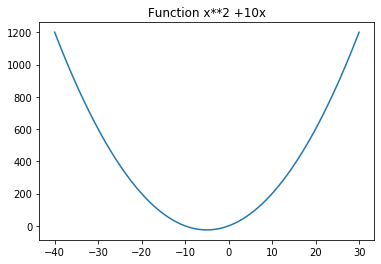

In [84]:
def f(x1):
    return x1**2.0 +10.0*x1#-x1*5 + x2**2.0
x = np.linspace(-40, 30, 300, dtype=np.float32)

y_func = f(x)
plt.title('Function x**2 +10x')
plt.plot(x,y_func)

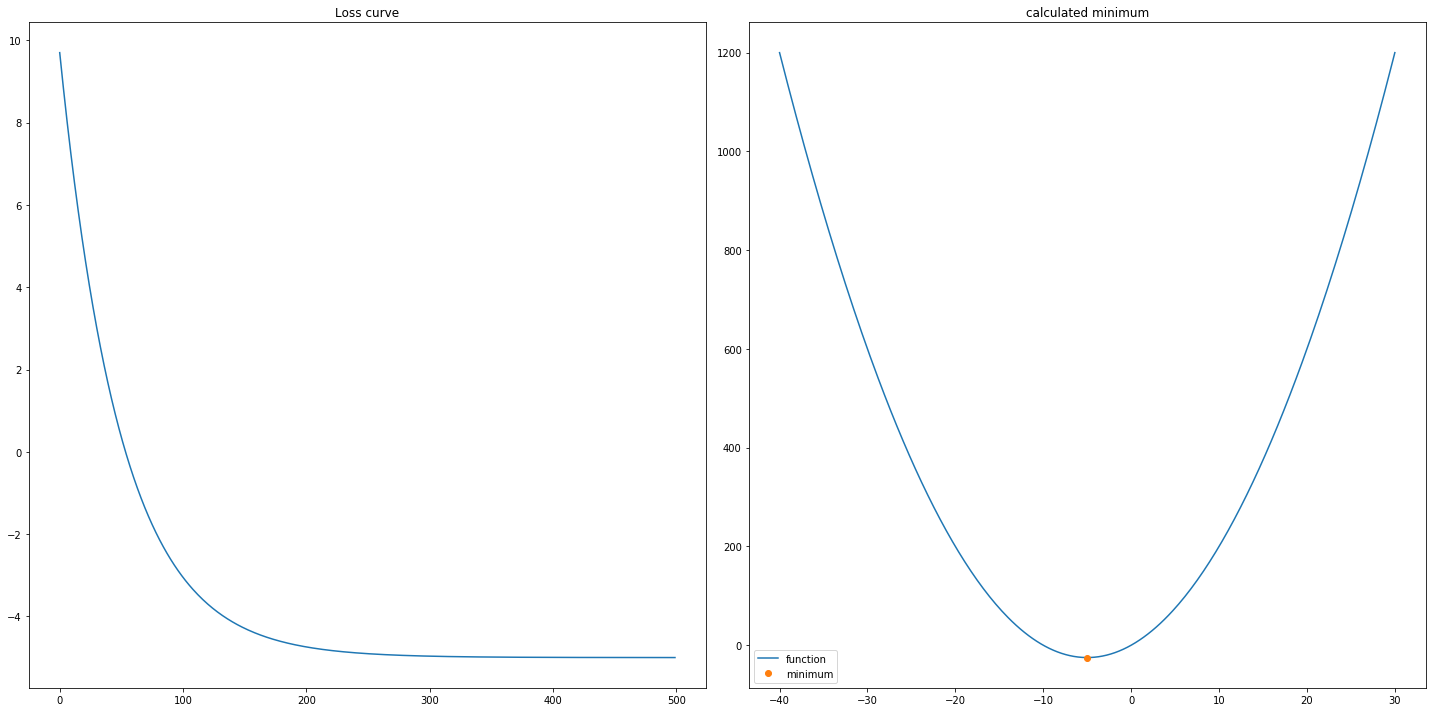

In [85]:
#function definition
def f(x1):
    return x1**2.0 +10.0*x1 
def f_opt():
    return x1**2.0 -x1*5 + x2**2.0

#starting value (randomly selected)
x1 = tf.Variable(10.0)
x2 = tf.Variable(7.0)

# Using the build in optimizer 

#opt = tf.keras.optimizers.SGD()
# for i in range(0,100):
#     print(f"y={f(x1,x2).numpy()} x1={x1.numpy()} x2={x2.numpy()}")
#     opt.minimize(f_opt,var_list=[x1,x2])

# for i in range(0,10):
#     with tf.GradientTape() as t:
#         y = f(x1,x2)
#     g = t.gradient(y,[x1,x2])
#     print([a for a in g])
#     g_and_v = zip([a for a in g],[x1,x2])
#     opt.apply_gradients(g_and_v)

# Computing the gradient by hand
l = []
learning_rate = 0.01
for i in range(0,500):
    #Calculating the gradient at each step!
    with tf.GradientTape() as t:
        y = f(x1)
    # calculated gradient
    g = t.gradient(y,[x1])
    # new x value calculated using the gradient and the learning rate
    x1.assign(x1-learning_rate*g[0].numpy())

    l.append(x1.numpy())


#Plotting the result    
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Loss curve')
plt.plot(l)
plt.subplot(1,2,2)
plt.title('calculated minimum')
plt.plot(x,y_func)
plt.plot(x1.numpy(),f(x1.numpy()),'o')
plt.legend(['function','minimum'])
plt.tight_layout()

<img src="https://raw.githubusercontent.com/tensorchiefs/dl_book/master/imgs/paper-pen.png" width="60" align="left" />  
Small Exercise: Play with the learning rate and see what happens if you make it smaller or larger, what happens if the learning rate is > 1 ? 

## 4. Activation Functions

Activation functions are mathematical equations that determine the output of a neural network. The function is attached to each neuron in the network, and determines whether it should be activated (“fired”) or not, based on whether each neuron’s input is relevant for the model’s prediction. Activation functions also help normalize the output of each neuron to a range between 1 and 0 or between -1 and 1.

An additional aspect of activation functions is that they must be computationally efficient because they are calculated across thousands or even millions of neurons for each data sample. Modern neural networks use a technique called backpropagation to train the model, which places an increased computational strain on the activation function, and its derivative function.

## Linear

$${\displaystyle f(x)={x}}
\hspace{1cm}
{\displaystyle f'(x) = 1}$$

<Figure size 432x288 with 0 Axes>

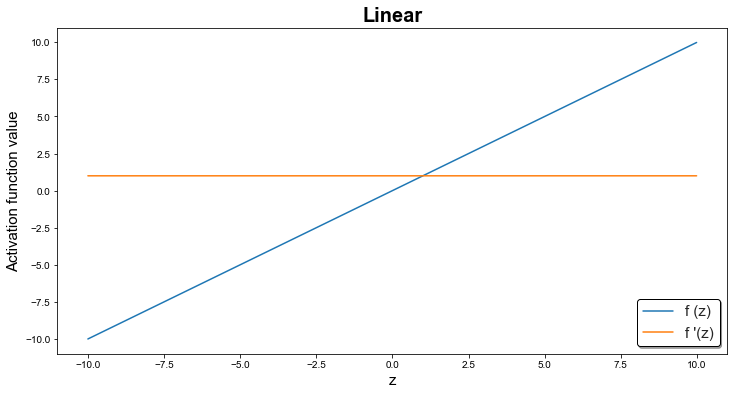

In [86]:
z = np.arange(-10, 10, 0.01)
f = z
df = np.ones_like(z)
make_plot(z, f, df, "Linear")

## Sigmoid

$${\displaystyle f(x)={\frac {1}{1+e^{-x}}}}
\hspace{1cm}
{\displaystyle f'(x) = f(x)\cdot(1-f(x))}$$

<Figure size 432x288 with 0 Axes>

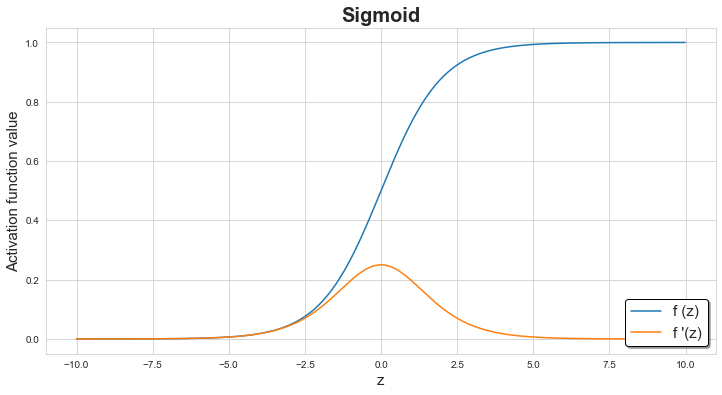

In [87]:
z = np.arange(-10, 10, 0.01)   
f = 1/(1 + np.exp(-z))
df = f*(1 - f)
make_plot(z, f, df, "Sigmoid")

### Tanh

$${\displaystyle f(x) = \tanh(x)={\frac {\sinh(x)}{\cosh (x)}}={\frac {e^{x}-e^{-x}}{e^{x}+e^{-x}}}}
\hspace{1cm}
{\displaystyle f'(x) = 1 - f(x)^{2}}$$

<Figure size 432x288 with 0 Axes>

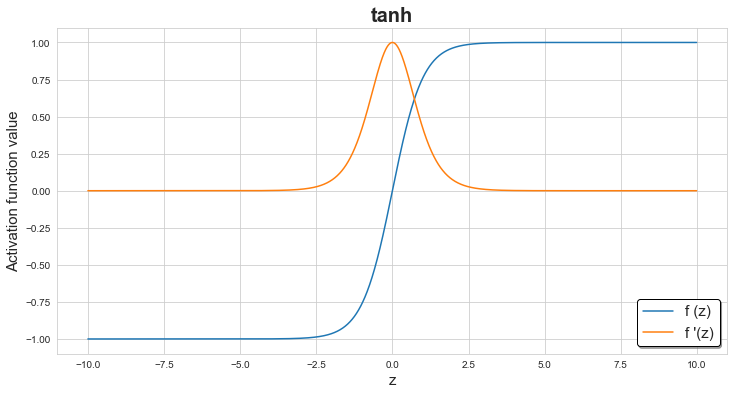

In [88]:
z = np.arange(-10, 10, 0.01)
f = np.tanh(z)
df = 1 - f*f
make_plot(z, f, df, "tanh")

### ELU

$${\displaystyle f(x) = \begin{cases}
x & \text{ if } x>0 \\ 
\alpha(e^z-1) & \text{ if } x\leq x 
\end{cases}}
\hspace{1cm}
{\displaystyle f'(x) = \begin{cases}
1 & \text{ if } x>0 \\ 
\alpha(e^z) & \text{ if } x< x 
\end{cases}}$$

<Figure size 432x288 with 0 Axes>

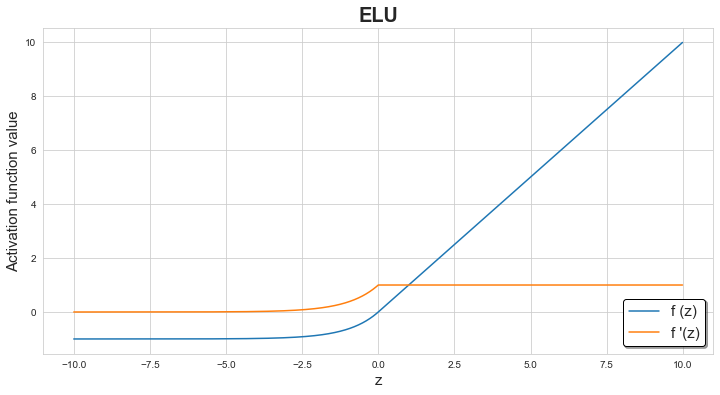

In [89]:
alpha=1.
z = np.arange(-10, 10, 0.01)
f = np.where(z > 0, z, alpha*(np.exp(z) - 1))
df = np.where(z > 0, 1, alpha*(np.exp(z)))
make_plot(z, f, df, "ELU")

### ReLU

$${\displaystyle f(x) = \begin{cases}
0 & \text{ if } x<0 \\ 
x & \text{ if } x\geq x 
\end{cases}}
\hspace{1cm}
{\displaystyle f'(x) = \begin{cases}
0 & \text{ if } x<0 \\ 
1 & \text{ if } x\geq x 
\end{cases}}$$

<Figure size 432x288 with 0 Axes>

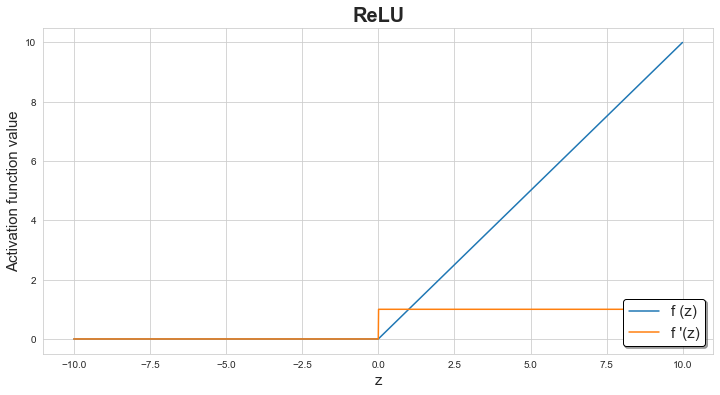

In [90]:
z = np.arange(-10, 10, 0.01)
f = z * (z > 0)
df = 1. * (z > 0)
make_plot(z, f, df, "ReLU")

### Leaky ReLU

$${\displaystyle f(x) = \begin{cases}
0.01 \cdot x & \text{ if } x<0 \\ 
x & \text{ if } x\geq x 
\end{cases}}
\hspace{1cm}
{\displaystyle f'(x) = \begin{cases}
0.01 & \text{ if } x<0 \\ 
1 & \text{ if } x\geq x 
\end{cases}}$$

<Figure size 432x288 with 0 Axes>

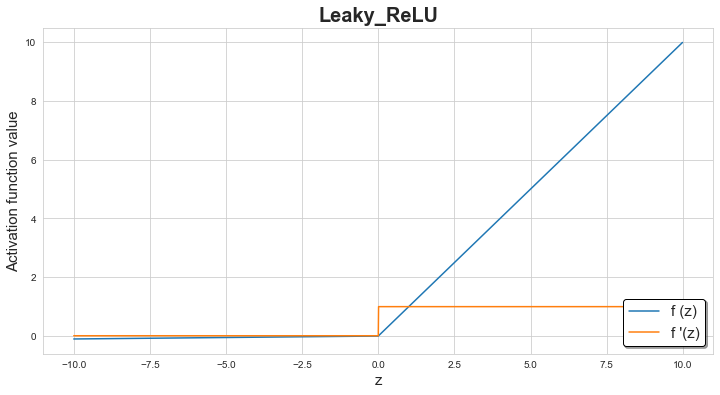

In [91]:
z = np.arange(-10, 10, 0.01)
f = np.where(z > 0, z, z * 0.01)
df = np.where(z > 0, 1, 0.01)
make_plot(z, f, df, "Leaky_ReLU")

### Softplus

$${\displaystyle f(x) = ln(1+e^{x})}
\hspace{1cm}
{\displaystyle f'(x)={\frac {e^x}{1+e^{x}}}={\frac {1}{1+e^{-x}}}}$$

<Figure size 432x288 with 0 Axes>

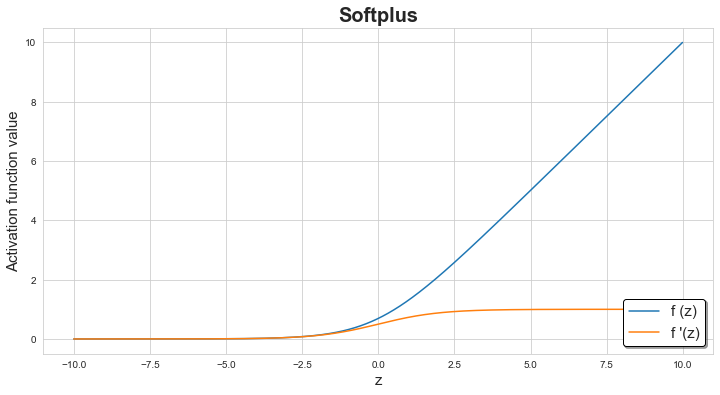

In [92]:
z = np.arange(-10, 10, 0.01)
f = np.log(1 + np.exp(z))
df = 1/(1 + np.exp(-z)) # = Sigmoid
make_plot(z, f, df, "Softplus")

<Figure size 432x288 with 0 Axes>

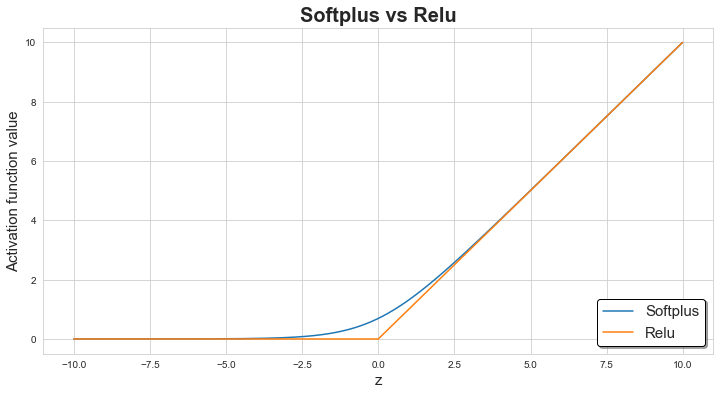

In [93]:
z = np.arange(-10, 10, 0.01)
f = np.log(1 + np.exp(z))
df = z * (z > 0)
make_plot(z, f, df, "Softplus vs Relu",f_name='Softplus',df_name='Relu')